## Does sex, age or ethnicity make a person more susceptible to being a victim of a crime?     What demographics are most at risk for the specific crimes of focus? 

In [1]:
# Importing dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in cleaned csv file 
cleaned_crime = pd.read_csv("Cleaned_Crime_Data.csv")
cleaned_crime.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
0,200648,03/11/2015,1600,Central,143,SHOPLIFTING - PETTY THEFT ($950 & UNDER),27.0,M,H,OTHER STORE,"(34.0481, -118.2507)",3,11,2015,34.0481,-118.2507
1,202598,07/08/2015,2355,Central,153,TRESPASSING,32.0,M,B,HOTEL,"(34.0467, -118.252)",7,8,2015,34.0467,-118.2520
2,205673,07/15/2015,1600,Central,162,"THEFT, PERSON",54.0,F,H,DEPARTMENT STORE,"(34.048, -118.2577)",7,15,2015,34.0480,-118.2577
3,409110,07/23/2015,715,Central,105,BURGLARY FROM VEHICLE,30.0,F,W,STREET,"(34.0688, -118.2333)",7,23,2015,34.0688,-118.2333
4,490916,07/17/2015,1510,Central,111,DOCUMENT FORGERY / STOLEN FELONY,44.0,F,O,BANK,"(34.0604, -118.2393)",7,17,2015,34.0604,-118.2393


In [3]:
# Filtering the DataFrame for the year 2015 only 
cleaned_crime = cleaned_crime.loc[cleaned_crime["Year"]==2015]
cleaned_crime.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
0,200648,03/11/2015,1600,Central,143,SHOPLIFTING - PETTY THEFT ($950 & UNDER),27.0,M,H,OTHER STORE,"(34.0481, -118.2507)",3,11,2015,34.0481,-118.2507
1,202598,07/08/2015,2355,Central,153,TRESPASSING,32.0,M,B,HOTEL,"(34.0467, -118.252)",7,8,2015,34.0467,-118.2520
2,205673,07/15/2015,1600,Central,162,"THEFT, PERSON",54.0,F,H,DEPARTMENT STORE,"(34.048, -118.2577)",7,15,2015,34.0480,-118.2577
3,409110,07/23/2015,715,Central,105,BURGLARY FROM VEHICLE,30.0,F,W,STREET,"(34.0688, -118.2333)",7,23,2015,34.0688,-118.2333
4,490916,07/17/2015,1510,Central,111,DOCUMENT FORGERY / STOLEN FELONY,44.0,F,O,BANK,"(34.0604, -118.2393)",7,17,2015,34.0604,-118.2393


In [4]:
# Creating individual DataFrames for all the crimes of focus 
# Identifying crime descriptions in a list for a for loop
crimes = ["CRIMINAL HOMICIDE", "ARSON", "KIDNAPPING", "THROWING OBJECT AT MOVING VEHICLE", "PICKPOCKET"]

# Creating empty list to hold crime dataframes for each crime of focus 
crime_list = []

# For loop creating each DataFrame
for crime in crimes: 
    crime_df = cleaned_crime[(cleaned_crime["Crime Code Description"] == crime)]
    crime_list.append(crime_df)
crime_list

[        Unnamed: 0 Date Occurred  Time Occurred Area Name  Reporting District  \
 630         995989    01/06/2015           1047   Central                 165   
 1173        996581    02/01/2015           2001   Central                 192   
 1285        996706    02/07/2015           1940   Central                 111   
 3269        998966    05/09/2015           1121   Central                 112   
 3754        999532    03/23/2015           1346   Central                 158   
 ...            ...           ...            ...       ...                 ...   
 164789     1192083    12/13/2015           2135   Olympic                2021   
 165304     1192684    09/05/2015             35   Topanga                2137   
 165445     1192847    12/25/2015           1308   Topanga                2118   
 171718     1199680    10/06/2015           1750   Topanga                2136   
 172978     1201123    10/28/2015           1609   Topanga                2189   
 
        Crime 

In [6]:
# Creating Criminal Homicide DataFrame
crim_hom_df = crime_list[0]

# Creating Arson DataFrame
arson_df = crime_list[1]

# Creating Kidnapping DataFrame 
knap_df = crime_list[2]

# Creating Throwing Object at Moving Vehicle DataFrame
vehicle_df = crime_list[3]

# Creating Pickpocket DataFrame
pickpocket_df = crime_list[4]

## Exploratory Data Analysis

In [7]:
# Doing Exploratory Data Analysis to determine the number of each type of crime commited in 2015
crim_hom_num = len(crim_hom_df["Crime Code Description"])
print("In Los Angeles City, in 2015, there were...")
print(f"    {crim_hom_num} instances of criminal homicide reported")

arson_num = len(arson_df["Crime Code Description"])
print(f"    {arson_num} instances of arson reported")

knap_num = len(knap_df["Crime Code Description"])
print(f"    {knap_num} instances of kidnapping reported")

vehicle_num = len(vehicle_df["Crime Code Description"])
print(f"    {vehicle_num} instances of an object being thrown at a moving vehicle reported")

pickpocket_num = len(pickpocket_df["Crime Code Description"])
print(f"    {pickpocket_num} instances of pickpocketing reported")

focus_crime_sum = crim_hom_num + arson_num + knap_num + vehicle_num + pickpocket_num
print(f"Between the five crimes of focus, {focus_crime_sum} crimes were reported in total. ")

In Los Angeles City, in 2015, there were...
    275 instances of criminal homicide reported
    268 instances of arson reported
    171 instances of kidnapping reported
    150 instances of an object being thrown at a moving vehicle reported
    119 instances of pickpocketing reported
Between the five crimes of focus, 983 crimes were reported in total. 


In [9]:
# New DataFrame with all the crimes appended to one DataFrame
# Created both single DataFrames for each crime and one single DataFrame to allow for ease and flexibility when analyzing data 
focus_crimes = pd.DataFrame()
focus_crimes = pd.concat([crim_hom_df, arson_df, knap_df, vehicle_df, pickpocket_df])
focus_crimes = focus_crimes.reset_index(drop=True)
focus_crimes.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
0,995989,01/06/2015,1047,Central,165,CRIMINAL HOMICIDE,34.0,M,B,SIDEWALK,"(34.0433, -118.2488)",1,6,2015,34.0433,-118.2488
1,996581,02/01/2015,2001,Central,192,CRIMINAL HOMICIDE,48.0,F,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0407, -118.268)",2,1,2015,34.0407,-118.2680
2,996706,02/07/2015,1940,Central,111,CRIMINAL HOMICIDE,48.0,M,B,PARKING LOT,"(34.0606, -118.2439)",2,7,2015,34.0606,-118.2439
3,998966,05/09/2015,1121,Central,112,CRIMINAL HOMICIDE,58.0,M,W,SIDEWALK,"(34.0541, -118.2417)",5,9,2015,34.0541,-118.2417
4,999532,03/23/2015,1346,Central,158,CRIMINAL HOMICIDE,60.0,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0395, -118.2405)",3,23,2015,34.0395,-118.2405


## Victim Sex Aggregate

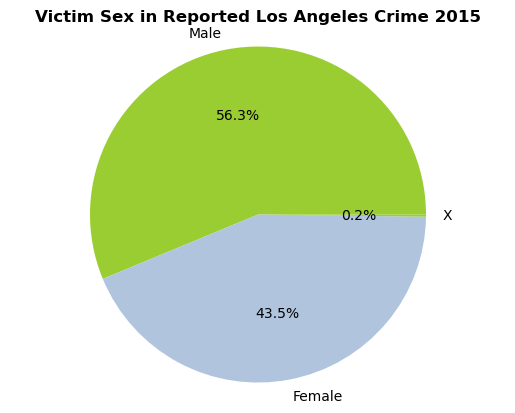

In [10]:
# For all the crimes of focus, determining if one sex is at greater risk of being a victim of a crime compared to the other 
focus_crimes_vs = focus_crimes["Victim Sex"].value_counts()
plt.pie(focus_crimes_vs, labels=["Male", "Female", "X"], colors=["yellowgreen","lightsteelblue"], autopct="%.1f%%")
plt.title("Victim Sex in Reported Los Angeles Crime 2015", fontweight="bold")
plt.axis("equal")
plt.savefig("output_data/Victim_Sex_Aggregate.png")
plt.show()

In order to determine whether one's sex, age or ethnicity makes them more susceptible to being a victim of a crime, I first focused on sex. Based on the pie chart of aggregate victim sex, males make up a greater percentage of the victims at 56.3% while females make up 43.5%. Variable X, which is assumed to mean no reported sex, makes up 0.2%. At less than one percent, X can be considered insignificant compared to males and females. 

Based on this data, it can be shown that males are at a greater risk than females for being victims of a crime. 

In [14]:
# Setting up to perform the Chi Square test on victim sex for further analysis
victim_sex_df = pd.DataFrame(focus_crimes_vs)
victim_sex_df

,Victim Sex
M,553
F,428
X,2


Chose to perform a Chi Square test on victim sex for further analysis because it is categorical data that is mutually exclusive.

Null Hypothesis: There is no statistical significance in the distribution of male and female victims. 

Alternative Hypothesis: There is statistical significance in the distribution of male and female victims. 

In [15]:
# Decided to evaluate only male and female since X made up only 0.2% of the entire dataset. 
# Creating new DataFrame but dropping variable X 
victim_sex_df = victim_sex_df[victim_sex_df["Victim Sex"]!=2]

# Creating an Expected column by taking the total number of reported crimes (983) and subtracting out 2 for Victim Sex = X
# Dividing the new number of 981 by 2 to determine the expected equal split 
victim_sex_df["Expected"] = (981/2) 
victim_sex_df.columns = ["Victim Sex Observed", "Victim Sex Expected"]
victim_sex_df

,Victim Sex Observed,Victim Sex Expected
M,553,490.5
F,428,490.5


In [16]:
# Calculating the Critical Value 
critical_value = stats.chi2.ppf(q = 0.95, df=1)
critical_value

3.841458820694124

In [17]:
# Performing the Chi Square Test 
stats.chisquare(victim_sex_df["Victim Sex Observed"], victim_sex_df["Victim Sex Expected"])

Power_divergenceResult(statistic=15.927624872579, pvalue=6.581113762677667e-05)

Using only males and females, I performed a chi-square test to determine if there was any statisitical significance in the distribution of the two groups. The chi square value of 15.927624872579 is much greater than the critical value of 3.841458820694124 and the p-value of 6.581113762677667e-05 is less than 0.05. Therefore, it can be said with 95% confidence, that the results are statistically significant. 

## Victim Sex for Crimes of Focus

In [19]:
# Getting the victim sexes for pie chart plotting from each individual crime of focus
crim_hom_vs = crim_hom_df["Victim Sex"].value_counts()
arson_vs = arson_df["Victim Sex"].value_counts()
knap_vs = knap_df["Victim Sex"].value_counts()
vehicle_vs = vehicle_df["Victim Sex"].value_counts()
pickpocket_vs = pickpocket_df["Victim Sex"].value_counts()

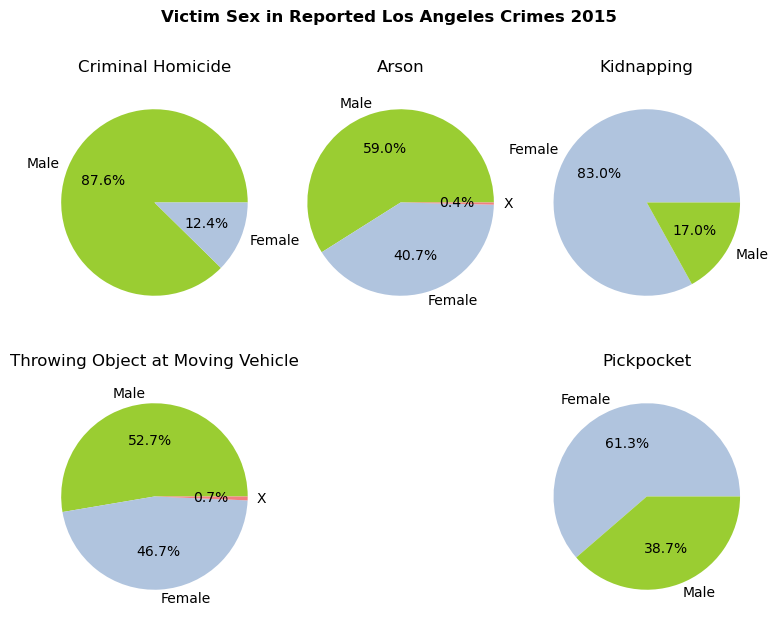

In [20]:
# Plotting the victim sex for each of the focus crimes in one plot 
# Creating and titling main plot 
fig = plt.figure(figsize=(9,7))
fig.suptitle("Victim Sex in Reported Los Angeles Crimes 2015", fontweight="bold")

# Criminal Homicide Subplot 
cr1 = plt.subplot2grid((2,3), (0,0))
plt.pie(crim_hom_vs, labels=["Male", "Female"], colors=["yellowgreen","lightsteelblue"], autopct="%.1f%%")
plt.title("Criminal Homicide")
plt.axis("equal")

# Arson Subplot
cr2 = plt.subplot2grid((2,3), (0,1))
plt.pie(arson_vs, labels=["Male", "Female", "X"], colors=["yellowgreen","lightsteelblue", "lightcoral"], autopct="%.1f%%")
plt.title("Arson")
plt.axis("equal")

# Kidnapping Subplot
cr3 = plt.subplot2grid((2,3), (0,2))
plt.pie(knap_vs, labels=["Female", "Male"], colors=["lightsteelblue","yellowgreen"], autopct="%.1f%%")
plt.title("Kidnapping")
plt.axis("equal")

# Throwing Object at Moving Vehicle Subplot
cr4 = plt.subplot2grid((2,3), (1,0))
plt.pie(vehicle_vs, labels=["Male", "Female", "X"], colors=["yellowgreen","lightsteelblue", "lightcoral"], autopct="%.1f%%")
plt.title("Throwing Object at Moving Vehicle")
plt.axis("equal")

# Pickpocket Subplot
cr5 = plt.subplot2grid((2,3), (1,2))
plt.pie(pickpocket_vs, labels=["Female", "Male"], colors=["lightsteelblue","yellowgreen"], autopct="%.1f%%")
plt.title("Pickpocket")
plt.axis("equal")

plt.savefig("output_data/Victim_Sex_Breakdown.png")
plt.show()

In order to get greater clarity on the influence of victim sex, I broke up the crime subset into the individual crimes of focus. The individual pie charts highlight that while males may be more at risk of being victim to a crime in general, specific crimes can vary greatly in the majority victim sex. For criminal homicide, arson and an object being thrown at a moving vehicle the majority of victims are male. But for kidnapping and pickpocketing, the majority of victims are female. 


## Victim Age

In [21]:
# Exploratory Data Analysis on all crimes of focus to determine overall mean, median, variance and standard deviation
focus_crimes_mean = focus_crimes["Victim Age"].mean()
focus_crimes_median = focus_crimes["Victim Age"].median()
focus_crimes_min = focus_crimes["Victim Age"].min()
focus_crimes_max = focus_crimes["Victim Age"].max()
focus_crimes_var = focus_crimes["Victim Age"].var()
focus_crimes_std = focus_crimes["Victim Age"].std()
print("For victims of reported crime in Los Angeles in 2015...")
print(f"The average age is {focus_crimes_mean:.0f}")
print(f"The median age is {focus_crimes_median:.0f}")
print(f"The minimum age is {focus_crimes_min:.0f}")
print(f"The maximum age is {focus_crimes_max:.0f}")
print(f"With a variance of {focus_crimes_var:.2f}")
print(f"And a standard deviation of {focus_crimes_std:.2f}")

For victims of reported crime in Los Angeles in 2015...
The average age is 36
The median age is 33
The minimum age is 10
The maximum age is 89
With a variance of 236.25
And a standard deviation of 15.37


In [22]:
# Creating a summary statistics table for victim age broken up by specific crimes
focus_crimes.groupby(["Crime Code Description"]).agg({"Victim Age": ['mean', 'median', 'min', 'max', 'var', 'std', 'sem']})

Victim Age                                 \
                                        mean median   min   max         var   
Crime Code Description                                                        
ARSON                              40.597015   38.5  14.0  89.0  271.020515   
CRIMINAL HOMICIDE                  34.901818   32.0  10.0  80.0  199.205654   
KIDNAPPING                         30.409357   26.0  10.0  80.0  180.596147   
PICKPOCKET                         37.873950   32.0  10.0  85.0  328.314485   
THROWING OBJECT AT MOVING VEHICLE  36.006667   34.0  12.0  64.0  160.382506   

                                                        
                                         std       sem  
Crime Code Description                                  
ARSON                              16.462701  1.005620  
CRIMINAL HOMICIDE                  14.114023  0.851108  
KIDNAPPING                         13.438607  1.027676  
PICKPOCKET                         18.119450  1.661007  
THROWING OBJECT AT MOVING VEHICLE  12.664221  1.034029

Based on the aggregate victim age data and the summary statistics table of victim age broken up crime, it is clear that the average and median age of victims falls mostly in the thirties. In some instances, like if the dataset is normally distributed, it may make more sense to use the mean over the median. However, in this case, while unclear on the dataset distribution (until the boxplots below), the median and mean are pretty similar in value. Based on this data it appears that the age range most affected by crime are those in their thirties. 

Despite the average and median ages being in the thirties, there is quite a large spread in the victim ages as seen by the large variances and higher standard deviations. This makes sense as the minimum victim ages can be as young as ten and the eldest as old as 89. Therefore, while it may be more common for a victim to be in their thirties, those younger and older are still at risk but possibly less so.

In [23]:
# Setting up outliers/IQR calculation for victim age
crim_hom = crim_hom_df.set_index("Crime Code Description")
arson = arson_df.set_index("Crime Code Description")
knap = knap_df.set_index("Crime Code Description")
vehicle = vehicle_df.set_index("Crime Code Description")
pickpocket = pickpocket_df.set_index("Crime Code Description")

In [24]:
# Pulling out victim age outliers using a for loop
focus_df_list = [crim_hom, arson, knap, vehicle, pickpocket]

for crime_df in focus_df_list:
    quartiles = crime_df['Victim Age'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = crime_df.loc[(crime_df['Victim Age']<lower_bound) | (crime_df['Victim Age']>upper_bound)]
    print(outliers[["Victim Age"]])

                        Victim Age
Crime Code Description            
CRIMINAL HOMICIDE             80.0
                        Victim Age
Crime Code Description            
ARSON                         89.0
                        Victim Age
Crime Code Description            
KIDNAPPING                    80.0
KIDNAPPING                    65.0
KIDNAPPING                    80.0
Empty DataFrame
Columns: [Victim Age]
Index: []
Empty DataFrame
Columns: [Victim Age]
Index: []


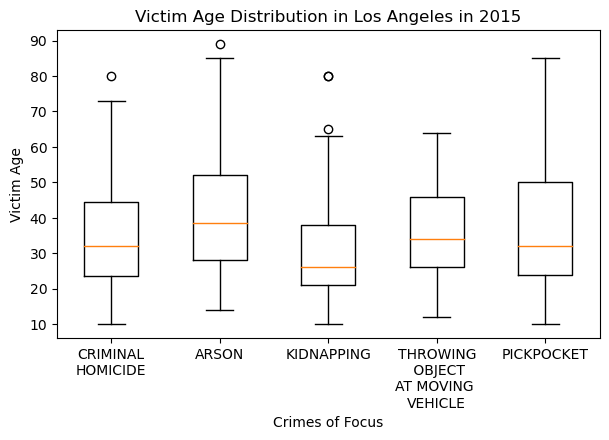

In [25]:
# Creating a box plot to plot victim age ranges, medians and outliers
crim_hom_age = crim_hom["Victim Age"]
arson_age = arson["Victim Age"]
knap_age = knap["Victim Age"]
vehicle_age = vehicle["Victim Age"]
pickpocket_age = pickpocket["Victim Age"]

focus_crime_ages = [crim_hom_age, arson_age, knap_age, vehicle_age, pickpocket_age]
plt.figure(figsize=(7,4))
plt.boxplot(focus_crime_ages)
plt.title("Victim Age Distribution in Los Angeles in 2015")
tick_loc_age = [1, 2, 3, 4, 5]
plt.xticks(tick_loc_age, ["CRIMINAL\nHOMICIDE", "ARSON", "KIDNAPPING", "THROWING\n OBJECT\nAT MOVING \nVEHICLE", "PICKPOCKET"], rotation=0)
plt.ylabel("Victim Age")
plt.xlabel("Crimes of Focus")
plt.savefig("output_data/Victim_Age_Breakdown.png")
plt.show()

The box and whisker plot helps to better visualize the victim ages. It can be seen that kidnapping and an object being thrown at a moving vehicle affect younger members of Los Angeles. It could be expected that throwing an object at a moving vehicle affects younger people because those in their eighties or nineties are not driving as much compared to younger groups. Interestingly, the minimum age for an object being thrown at a moving vehicle is well below sixteen. This dataset doesn't specify if the victim listed is the driver or a passenger, which could explain the minimum age of twelve.  
Arson and pickpocketing conversely have the highest maximum ages. Pickpocketing may affect an older group of victims because they may be easier to steal from compared to younger groups. In terms of outliers, criminal homicide, arson and kidnapping are the only crimes to yield outlying victim ages. All three groups have outliers that are older as opposed to younger. 

## Victim Descent

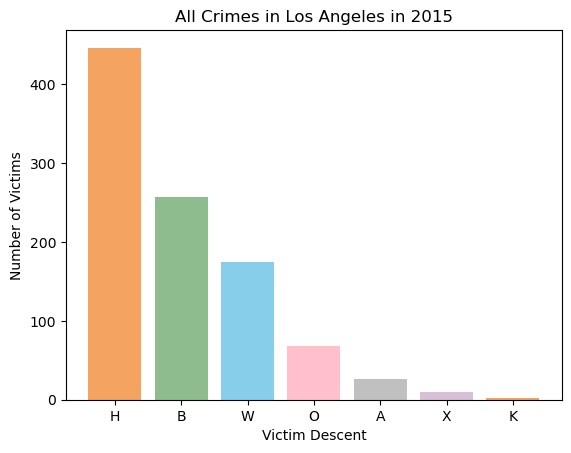

In [26]:
# Creating a bar chart of the victim descents for all the crimes of focus 
focus_crimes_d = focus_crimes["Victim Descent"].value_counts()
x_axis_fcd = np.arange(len(focus_crimes_d))
plt.bar(x_axis_fcd, focus_crimes_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("All Crimes in Los Angeles in 2015")
plt.ylabel("Number of Victims")
tick_loc_fcd = list(x_axis_fcd)
plt.xticks(tick_loc_fcd, ["H", "B", "W", "O", "A", "X", "K"])
plt.xlabel("Victim Descent")
plt.savefig("output_data/Victim_Descent_Aggregate.png")
plt.show()

In regard to victim descent, it is clear that the largest affected group is H followed by B, W and O. I tried to find information on victim descent codes for Los Angeles city online but was unable to. I assumed however, that H stood for Hispanic, B for Black, W for White and O for Other. While other victim descent groups are affected by crime, they are much smaller in comparison to the larger groups. The disproportionate number of group H being victim to crime in Los Angeles could be due in a large part to the population. According to the U.S. Census Bureau, the majority of the population in LA is Hispanic or Latino at 48.4%.  https://www.census.gov/quickfacts/losangelescitycalifornia

In [27]:
# Setting up another chi square test to determine if there is any statistical significance of the victim descent groups 
victim_descent_df = pd.DataFrame(focus_crimes_d)
victim_descent_df

,Victim Descent
H,446
B,257
W,174
O,68
A,26
X,10
K,2


Null Hypothesis: There is no statistical significance in the distribution of victim descent. 

Alternative Hypothesis: There is statistical significance in the distribution of victim descent. 

In [28]:
# Following the same process as the earlier chi square test, I took the total number of crimes and divided it by seven to get an even spread of victim descent for all crimes
victim_descent_df["Expected"] = (983/7)
victim_descent_df.columns = ["Victim Descent Observed", "Victim Descent Expected"]
victim_descent_df

,Victim Descent Observed,Victim Descent Expected
H,446,140.428571
B,257,140.428571
W,174,140.428571
O,68,140.428571
A,26,140.428571
X,10,140.428571
K,2,140.428571


In [29]:
# Calculating the critical value 
critical_value_2 = stats.chi2.ppf(q = 0.95, df=6)
critical_value_2

12.591587243743977

In [30]:
# Performing the actual chi square test 
stats.chisquare(victim_descent_df["Victim Descent Observed"], victim_descent_df["Victim Descent Expected"])

Power_divergenceResult(statistic=1157.910478128179, pvalue=6.14744501668432e-247)

The chi square value of 1157.910478128179 at a 95% confidence level is much greater than the critical value of 12.591587243743977, therefore the victim descents are statistically significant. 

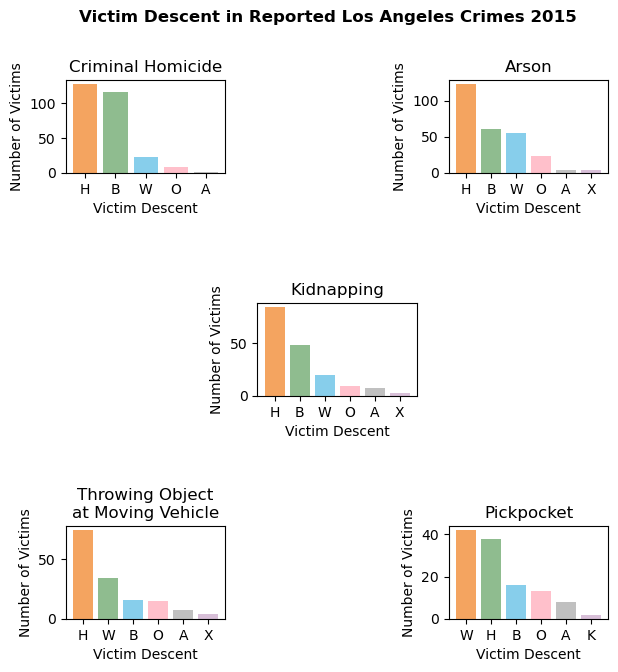

In [31]:
# Victim Descent Bar Plots 
fig2 = plt.figure(figsize=(7,7))
fig2.suptitle("Victim Descent in Reported Los Angeles Crimes 2015", fontweight="bold")

vbp1 = plt.subplot2grid((5,3), (0,0))
crim_hom_d = crim_hom_df["Victim Descent"].value_counts()
x_axis_chd = np.arange(len(crim_hom_d))
plt.bar(x_axis_chd, crim_hom_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("Criminal Homicide")
plt.ylabel("Number of Victims")
tick_loc_chd = list(x_axis_chd)
plt.xticks(tick_loc_chd, ["H", "B", "W", "O", "A"])
plt.xlabel("Victim Descent")

vbp2 = plt.subplot2grid((5,3), (0,2))
arson_d = arson_df["Victim Descent"].value_counts()
x_axis_ad = np.arange(len(arson_d))
plt.bar(x_axis_ad, arson_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("Arson")
plt.ylabel("Number of Victims")
tick_loc_ad = list(x_axis_ad)
plt.xticks(tick_loc_ad, ["H", "B", "W", "O", "A", "X"])
plt.xlabel("Victim Descent")

vbp3 = plt.subplot2grid((5,3), (2,1))
knap_d = knap_df["Victim Descent"].value_counts()
x_axis_kd = np.arange(len(knap_d))
plt.bar(x_axis_kd, knap_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("Kidnapping")
plt.ylabel("Number of Victims")
tick_loc_kd = list(x_axis_kd)
plt.xticks(tick_loc_kd, ["H", "B", "W", "O", "A", "X"])
plt.xlabel("Victim Descent")

vbp4 = plt.subplot2grid((5,3), (4,0))
vehicle_d = vehicle_df["Victim Descent"].value_counts()
x_axis_vd = np.arange(len(vehicle_d))
plt.bar(x_axis_vd, vehicle_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("Throwing Object\nat Moving Vehicle")
plt.ylabel("Number of Victims")
tick_loc_vd = list(x_axis_vd)
plt.xticks(tick_loc_vd, ["H", "W", "B", "O", "A", "X"])
plt.xlabel("Victim Descent")

vbp5 = plt.subplot2grid((5,3), (4,2))
pickpocket_d = pickpocket_df["Victim Descent"].value_counts()
x_axis_pd = np.arange(len(pickpocket_d))
plt.bar(x_axis_pd, pickpocket_d, align="center", color=["sandybrown", "darkseagreen", "skyblue", "pink", "silver", "thistle"])
plt.title("Pickpocket")
plt.ylabel("Number of Victims")
tick_loc_pd = list(x_axis_pd)
plt.xticks(tick_loc_pd, ["W", "H", "B", "O", "A", "K"])
plt.xlabel("Victim Descent")

plt.savefig("output_data/Victim_Descent_Breakdown.png")
plt.show()

Breaking up the crimes into their own separate bar charts, it becomes clear that the victim descents vary between crimes. For criminal homicide, arson, kidnapping and throwing object at a moving vehicle, the most affected group is H. However, for pickpocketing, the most affected group is W followed closely by H. Similarly to the aggregate data, the most affected groups are H, B, W and O. A and K also appear in the bar charts but their quantities are less than half of the majority groups. 

## Conclusion

From the analysis on victim sex, age and descent, it can be said that the groups most affected by crime in Los Angeles in 2015 were males, those in their thirities and those of Hispanic descent. 